Synthetic dataset created successfully!
Shape of features (X): (1000, 20)
Shape of target (y): (1000,)

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.90      0.93      0.91       101

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



/tmp/ipython-input-1258894843.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_y, ax=axes[0, 0], palette='viridis')
/tmp/ipython-input-1258894843.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, ax=axes[1, 0], palette='magma')


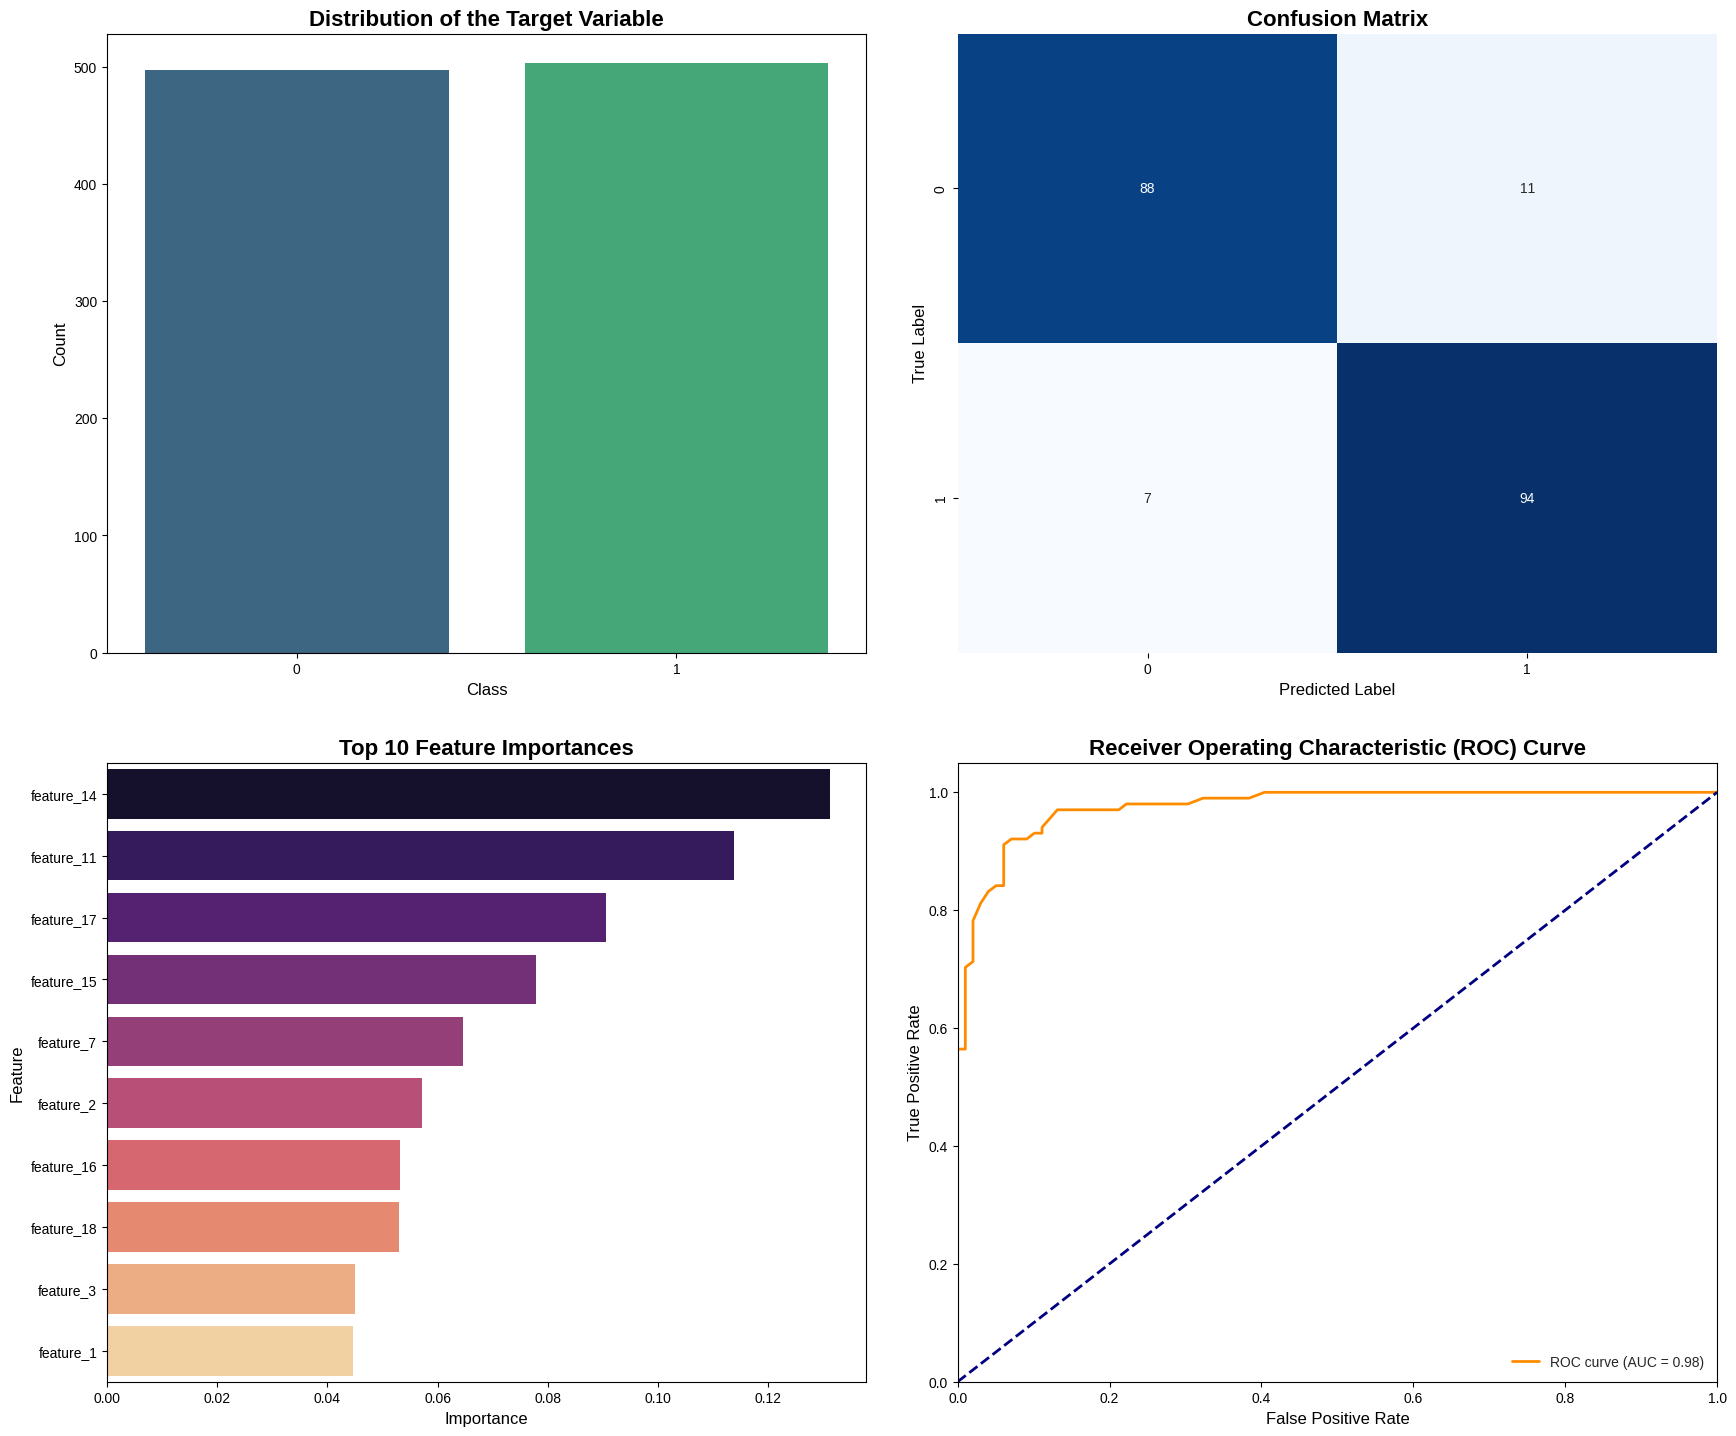

In [5]:
# ------------------- Import Libraries -------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.datasets import make_classification

# ------------------- Create Synthetic Dataset -------------------
# This generates a random dataset for a binary classification task.
# It has 1000 samples, 20 features, and 2 informative classes.
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Convert to a pandas DataFrame for easier handling and plotting
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df_X = pd.DataFrame(X, columns=feature_names)
df_y = pd.Series(y, name='target')

print("Synthetic dataset created successfully!")
print("Shape of features (X):", df_X.shape)
print("Shape of target (y):", df_y.shape)

# ------------------- Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42, stratify=df_y
)

# ------------------- Model Training -------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ------------------- Predictions -------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

# ------------------- Evaluation & Plotting -------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create a figure with a grid of 2x2 subplots for the four graphs
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'

# --- Graph 1: Target Variable Distribution ---
sns.countplot(x=df_y, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title("Distribution of the Target Variable", fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel("Class", fontsize=12)
axes[0, 0].set_ylabel("Count", fontsize=12)

# --- Graph 2: Confusion Matrix Heatmap ---
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title("Confusion Matrix", fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel("Predicted Label", fontsize=12)
axes[0, 1].set_ylabel("True Label", fontsize=12)

# --- Graph 3: Top 10 Feature Importances ---
importances = pd.Series(model.feature_importances_, index=df_X.columns)
importances = importances.sort_values(ascending=False).head(10)
sns.barplot(x=importances, y=importances.index, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel("Importance", fontsize=12)
axes[1, 0].set_ylabel("Feature", fontsize=12)

# --- Graph 4: ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axes[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_title("Receiver Operating Characteristic (ROC) Curve", fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel("False Positive Rate", fontsize=12)
axes[1, 1].set_ylabel("True Positive Rate", fontsize=12)
axes[1, 1].legend(loc="lower right")

# Adjust layout and display plots
plt.tight_layout(pad=3.0)
plt.show()
